Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [38]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from glob import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [39]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [40]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:\\PG_AI_ML\\CNN\\New folder\\CNN_assignment (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")
data_dir_test = pathlib.Path('C:\\PG_AI_ML\\CNN\\New folder\\CNN_assignment (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test')

In [41]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
56


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [42]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [43]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [44]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [45]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

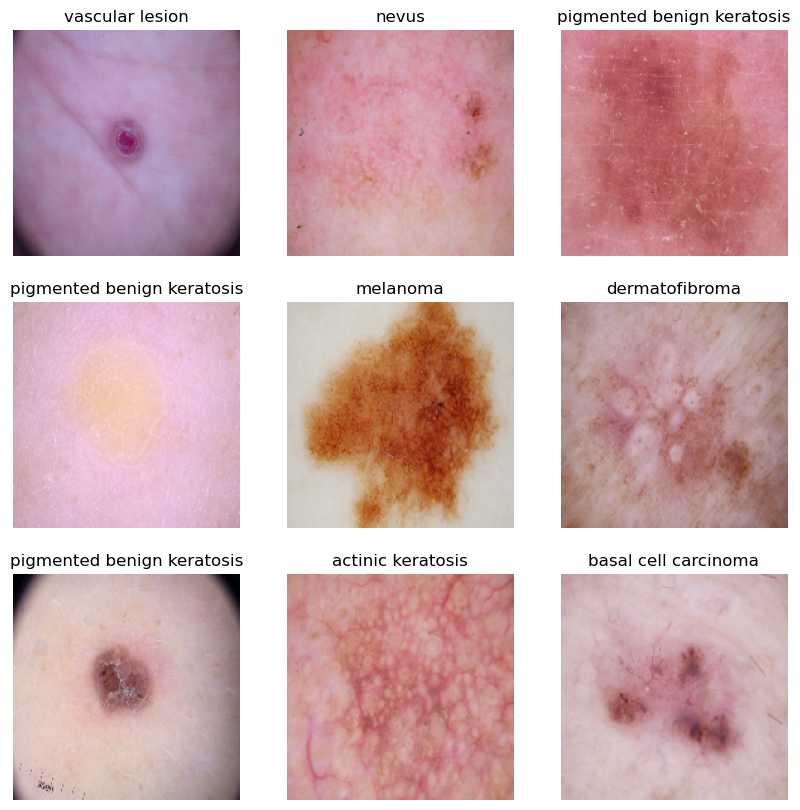

In [46]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [47]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [48]:
### Your code goes here

input_shape = (180,180,3)
lr = 1e-5
init = 'normal'
activ = 'relu'

model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))#normalization
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))

## Number of classes is 9


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [49]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
# View the summary of all layers
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_44 (ModuleWr  (None, 178, 178, 32)     896       
 apper)                                                          
                                                                 
 module_wrapper_45 (ModuleWr  (None, 89, 89, 32)       0         
 apper)                                                          
                                                                 
 module_wrapper_46 (ModuleWr  (None, 87, 87, 64)       18496     
 apper)                                                          
                                                                 
 module_wrapper_47 (ModuleWr  (None, 43, 43, 64)       0         
 apper)                                               

### Train the model

In [51]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 36s 558ms/step - loss: 2.1493 - accuracy: 0.2467 - val_loss: 1.7819 - val_accuracy: 0.3087
Epoch 2/20
56/56 [==============================] - 37s 667ms/step - loss: 1.6221 - accuracy: 0.4347 - val_loss: 1.5082 - val_accuracy: 0.4720
Epoch 3/20
56/56 [==============================] - 42s 751ms/step - loss: 1.4653 - accuracy: 0.5000 - val_loss: 1.3905 - val_accuracy: 0.5369
Epoch 4/20
56/56 [==============================] - 43s 763ms/step - loss: 1.3556 - accuracy: 0.5167 - val_loss: 1.4022 - val_accuracy: 0.4944
Epoch 5/20
56/56 [==============================] - 39s 698ms/step - loss: 1.2837 - accuracy: 0.5469 - val_loss: 1.4568 - val_accuracy: 0.5078
Epoch 6/20
56/56 [==============================] - 40s 717ms/step - loss: 1.2993 - accuracy: 0.5346 - val_loss: 1.3752 - val_accuracy: 0.5213
Epoch 7/20
56/56 [==============================] - 39s 706ms/step - loss: 1.1981 - accuracy: 0.5804 - val_loss: 1.4062 - val_accuracy: 0.5391

### Visualizing training results

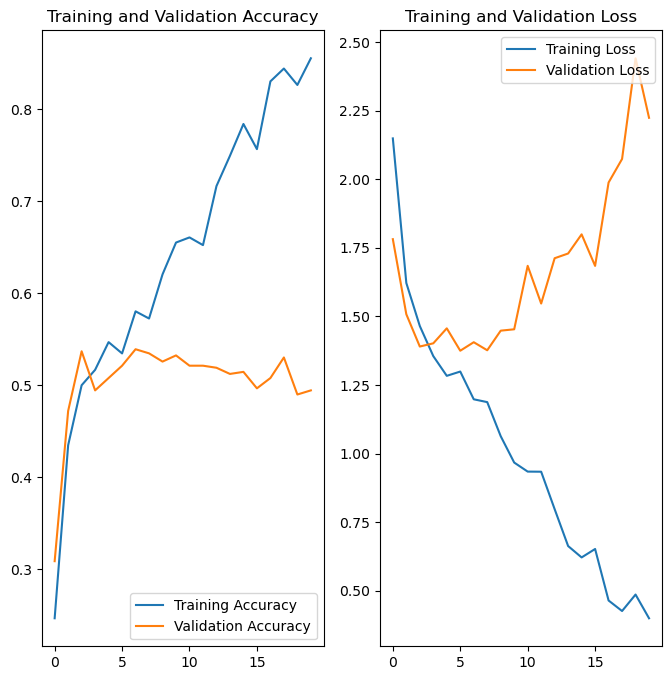

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

## My Findings
#### As per the above curves, accuracy on the Training is very high when compared to validation. That means the model is overfit.
#### The loss is continuously decreasing without any variations. That mean the model is overfit and needs to appropriate data augmentation

In [53]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 2s 122ms/step - loss: 2.2244 - accuracy: 0.4944
Accuracy:  0.8487723469734192
Validation Accuracy:  0.49440714716911316
Loss:  0.39837104082107544
Validation Loss 2.2243974208831787


### Write your findings here
#### Train accuracy is 84% and validation accuracy is 49%, which clearly shows the overfitting. We should apply the first step of agumentation by changing initial input by flipping the same set of images. Then try to build the model again.

In [78]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augmentation strategy. 
# Better augumentation strategy is to generate new data in the train set so that train set have more images/values to perdict better.
# With less data in train set the model network tends to have more control over the data.
# Your code goes here
datagenerated = ImageDataGenerator(
        featurewise_center=False, 
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False,  
        vertical_flip=False)  

image_class = ['nevus','melanoma','basal_cell_caricoma','actinic_keratosis','vasc_lesion','dermatofibroma', 'pigmented_keratosis', 'seborrheic_keratosis', 'squamous_carci']

train_batches = datagenerated.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 32
 )
 
valid_batches = datagenerated.flow_from_directory(data_dir_train, 
    target_size = (180,180),
    classes = image_class,
    batch_size = 32)

Found 890 images belonging to 9 classes.
Found 890 images belonging to 9 classes.


'\ntrain_batches = datagenerated.flow_from_directory(data_dir_train, \n    target_size = (180,180),\n    classes = image_class,\n    batch_size = 32\n )\n \nvalid_batches = datagenerated.flow_from_directory(data_dir_test, \n    target_size = (180,180),\n    classes = image_class,\n    batch_size = 32)\n\n\ntrain_batches = datagenerated.flow_from_directory(\n  data_dir_train,\n  validation_split=0.2,\n  subset="training",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)\n\nvalid_batches = datagenerated.flow_from_directory(\n  data_dir_train,\n  validation_split=0.2,\n  subset="validation",\n  seed=123,\n  image_size=(img_height, img_width),\n  batch_size=batch_size)\n'

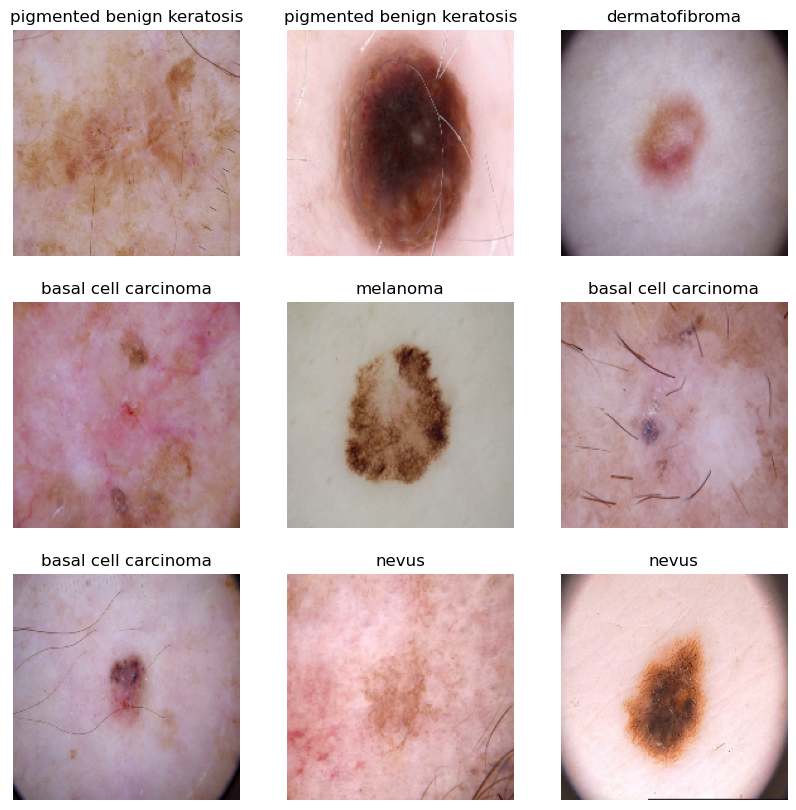

In [55]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Todo:
### 2. Create the model, compile and train the model


In [83]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential()

model.add(tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,img_width,3)))
model.add(tf.keras.layers.experimental.preprocessing.RandomRotation(0.1))
model.add(tf.keras.layers.experimental.preprocessing.RandomZoom(0.1))
# Increse the model size by adding another 32 layer
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))#normalization

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = 'Same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax')) #number of output class

### Compiling the model

In [84]:
## Your code goes here
#optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 180, 180, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 180, 180, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_133 (ModuleW  (None, 180, 180, 32)     896       
 rapper)                                                         
                                                                 
 module_wrapper_134 (ModuleW  (None, 90, 90, 32)     

In [85]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)

### Training the model

In [86]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
batch_size = 32
#history = model.fit(train_batches, epochs = epochs, verbose = 1, validation_data=valid_batches , callbacks=[learning_rate_reduction])
history = model.fit(train_ds, epochs = epochs, verbose = 1, validation_data=val_ds)

Epoch 1/20
56/56 [==============================] - 45s 738ms/step - loss: 2.4733 - accuracy: 0.1908 - val_loss: 2.0649 - val_accuracy: 0.2260
Epoch 2/20
56/56 [==============================] - 48s 850ms/step - loss: 1.9818 - accuracy: 0.2494 - val_loss: 1.8385 - val_accuracy: 0.3512
Epoch 3/20
56/56 [==============================] - 48s 862ms/step - loss: 1.8802 - accuracy: 0.3281 - val_loss: 1.7831 - val_accuracy: 0.3736
Epoch 4/20
56/56 [==============================] - 50s 897ms/step - loss: 1.7614 - accuracy: 0.3616 - val_loss: 1.9366 - val_accuracy: 0.2707
Epoch 5/20
56/56 [==============================] - 50s 899ms/step - loss: 1.7686 - accuracy: 0.3733 - val_loss: 1.6626 - val_accuracy: 0.4094
Epoch 6/20
56/56 [==============================] - 49s 878ms/step - loss: 1.6275 - accuracy: 0.4185 - val_loss: 1.5764 - val_accuracy: 0.4787
Epoch 7/20
56/56 [==============================] - 49s 867ms/step - loss: 1.5980 - accuracy: 0.4464 - val_loss: 1.6148 - val_accuracy: 0.4609

### Visualizing the results

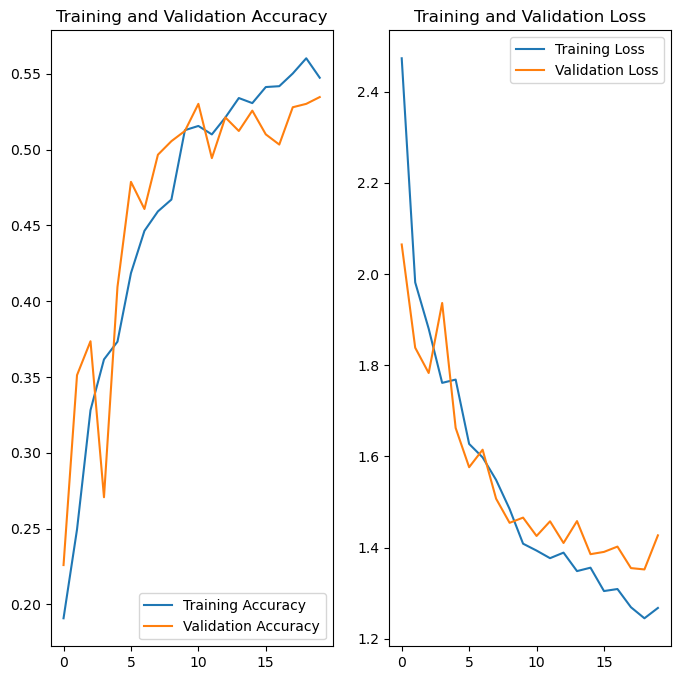

In [87]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [89]:
loss, accuracy = model.evaluate(train_ds, verbose=1,)
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

print("Accuracy: ", accuracy)
print("Validation Accuracy: ",accuracy_v)
print("Loss: ",loss)
print("Validation Loss", loss_v)

14/14 [==============================] - 2s 131ms/step - loss: 1.4270 - accuracy: 0.5347
Accuracy:  0.5658482313156128
Validation Accuracy:  0.5346755981445312
Loss:  1.190652847290039
Validation Loss 1.4269895553588867


#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?
#### Ans: As per my findings the model overfitting got resolved. The train accuracy is around 56% and validation is 53%. They both close enough.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<Figure size 1000x1000 with 0 Axes>

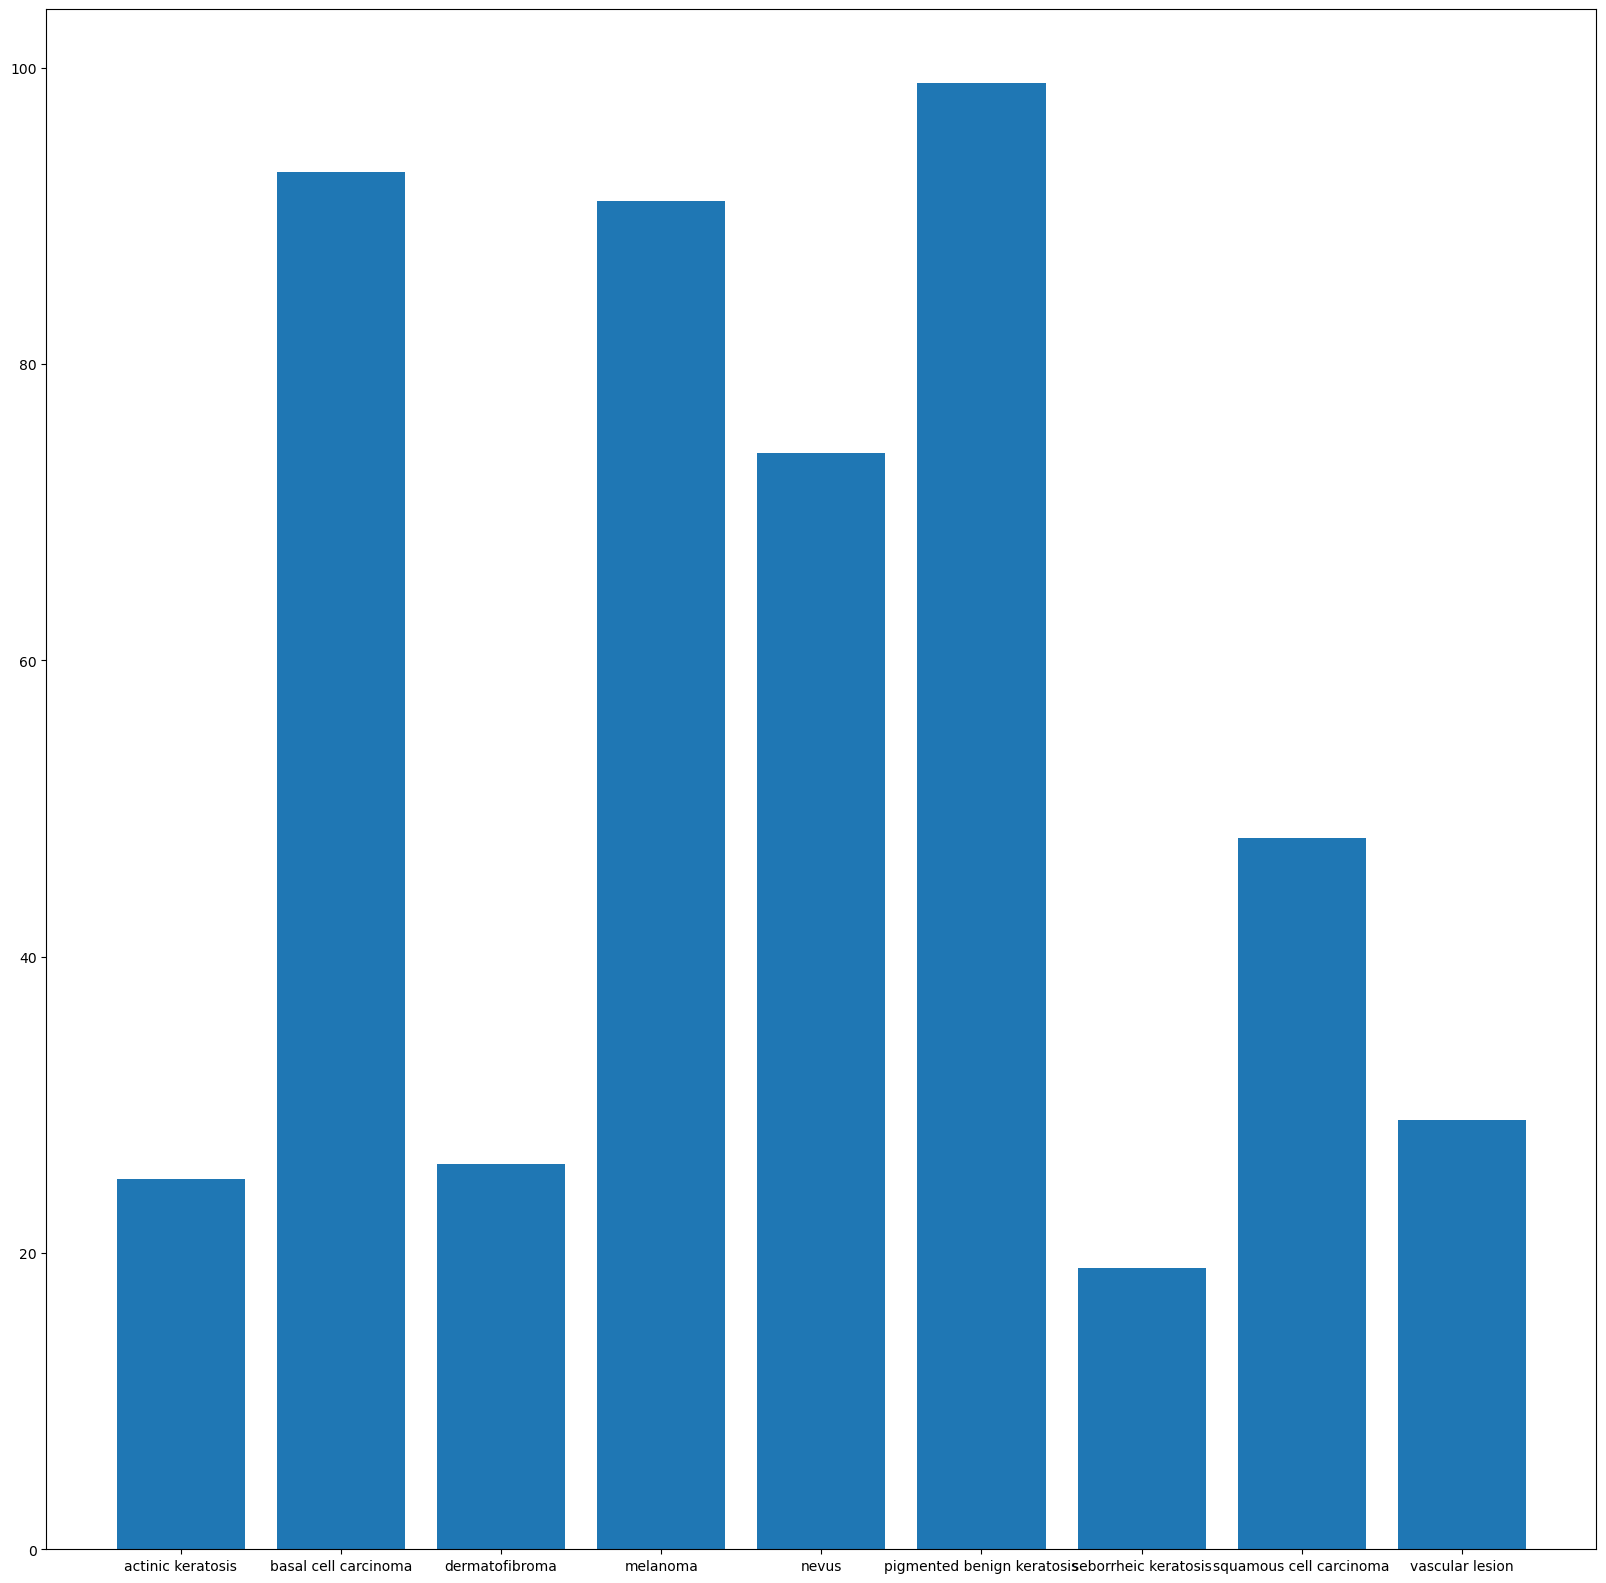

In [90]:
## Your code goes here.
## Below are the distribution of classes

import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(10, 10))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Ans: Class seborrheic keratosis as less number of samples than rest.
#### - Which classes dominate the data in terms proportionate number of samples?
#### - Ans: Class pigmented benign keratosis has more number of samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [91]:
path_to_training_dataset="C:\\PG_AI_ML\\CNN\\New folder\\CNN_assignment (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\"
#data_dir_train = pathlib.Path("C:\\PG_AI_ML\\CNN\\New folder\\CNN_assignment (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")
#data_dir_test = pathlib.Path('C:\\PG_AI_ML\\CNN\\New folder\\CNN_assignment (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to C:\PG_AI_ML\CNN\New folder\CNN_assignment (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x26302FF60D0>: 100%|█| 500/500 [00:03<00:00, 129.54 Samples


Initialised with 376 image(s) found.
Output directory set to C:\PG_AI_ML\CNN\New folder\CNN_assignment (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x263031B1490>: 100%|█| 500/500 [00:03<00:00, 135.02 Samples


Initialised with 95 image(s) found.
Output directory set to C:\PG_AI_ML\CNN\New folder\CNN_assignment (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2634E7A95E0>: 100%|█| 500/500 [00:03<00:00, 139.45 Samples


Initialised with 438 image(s) found.
Output directory set to C:\PG_AI_ML\CNN\New folder\CNN_assignment (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x263032EB1F0>: 100%|█| 500/500 [00:18<00:00, 26.48 Samples


Initialised with 357 image(s) found.
Output directory set to C:\PG_AI_ML\CNN\New folder\CNN_assignment (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.Image.Image image mode=RGB size=824x719 at 0x26301F46160>: 100%|█| 500/500 [00:21<00:00, 23.68 Samples/


Initialised with 462 image(s) found.
Output directory set to C:\PG_AI_ML\CNN\New folder\CNN_assignment (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x26301FCAD60>: 100%|█| 500/500 [00:03<00:00, 134.68 Samples


Initialised with 77 image(s) found.
Output directory set to C:\PG_AI_ML\CNN\New folder\CNN_assignment (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x26301F50280>: 100%|█| 500/500 [00:10<00:00, 47.15 Samples


Initialised with 181 image(s) found.
Output directory set to C:\PG_AI_ML\CNN\New folder\CNN_assignment (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x2630FCA41C0>: 100%|█| 500/500 [00:03<00:


Initialised with 139 image(s) found.
Output directory set to C:\PG_AI_ML\CNN\New folder\CNN_assignment (1)\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2634E044A30>: 100%|█| 500/500 [00:04<00:00, 105.12 Samples


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [92]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [93]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['C:\\PG_AI_ML\\CNN\\New folder\\CNN_assignment (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_089a0869-56f5-408e-818d-f2fdeec3600d.jpg',
 'C:\\PG_AI_ML\\CNN\\New folder\\CNN_assignment (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_152d6a6d-7d39-4c61-9d36-5129df8140b3.jpg',
 'C:\\PG_AI_ML\\CNN\\New folder\\CNN_assignment (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_2576d1b4-023d-4c5c-8b92-7e9811638d06.jpg',
 'C:\\PG_AI_ML\\CNN\\New folder\\CNN_assignment (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_85084568-b273-492c-b78a-d95adea1981c.jpg',
 'C:\\PG_AI_ML\\CNN\\New folder\\CNN_assignment (1)\

In [94]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [95]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [96]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df2 #original_df.append(df2)

In [97]:
new_df['Label'].value_counts()

actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [98]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [99]:
data_dir_train="C:\\PG_AI_ML\\CNN\\New folder\\CNN_assignment (1)\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [100]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [101]:
## your code goes here
model = Sequential()
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))#normalization
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(9))
model.add(Activation('softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [102]:
## your code goes here
#optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

In [103]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 module_wrapper_146 (ModuleW  (None, 178, 178, 32)     896       
 rapper)                                                         
                                                                 
 module_wrapper_147 (ModuleW  (None, 89, 89, 32)       0         
 rapper)                                                         
                                                                 
 module_wrapper_148 (ModuleW  (None, 87, 87, 64)       18496     
 rapper)                                                         
                                                                 
 module_wrapper_149 (ModuleW  (None, 43, 43, 64)       0         
 rapper)                                             

#### **Todo:**  Train your model

In [ ]:
epochs = 30
## Your code goes here, use 30 epochs.
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
    patience=3, 
    verbose=1, 
    factor=0.5, 
    min_lr=0.00001)
batch_size = 32

history = model.fit(train_ds,
  epochs = epochs, verbose = 1, validation_data=val_ds )#callbacks=[learning_rate_reduction]# your model fit code

Epoch 1/30
169/169 [==============================] - 128s 752ms/step - loss: 1.9853 - accuracy: 0.2936 - val_loss: 1.4773 - val_accuracy: 0.4254
Epoch 2/30
169/169 [==============================] - 130s 770ms/step - loss: 1.3906 - accuracy: 0.4833 - val_loss: 1.2833 - val_accuracy: 0.5122
Epoch 3/30
169/169 [==============================] - 128s 756ms/step - loss: 1.2227 - accuracy: 0.5512 - val_loss: 1.2309 - val_accuracy: 0.5405
Epoch 4/30
169/169 [==============================] - 129s 764ms/step - loss: 1.0395 - accuracy: 0.6228 - val_loss: 1.1293 - val_accuracy: 0.5731
Epoch 5/30
 84/169 [=============>................] - ETA: 1:00 - loss: 0.9149 - accuracy: 0.6596

#### **Todo:**  Visualize the model results

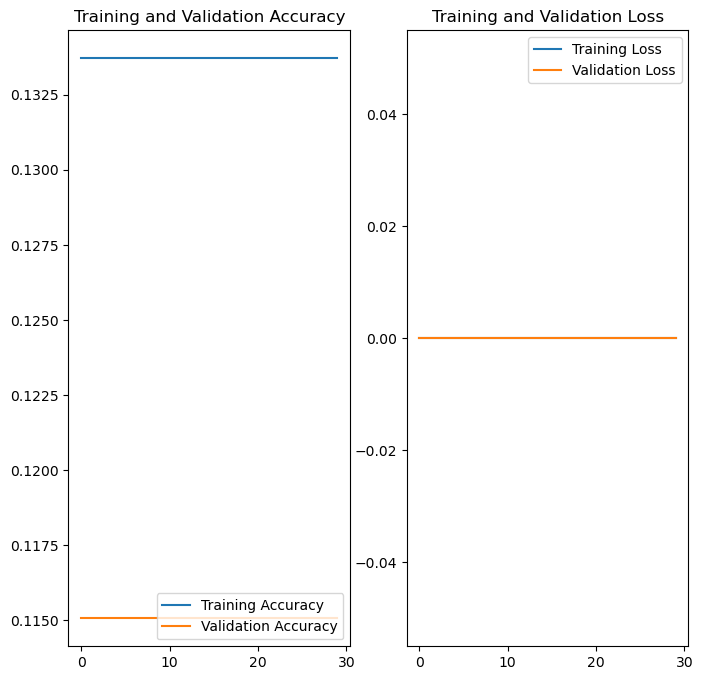

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
The class rebalance helped in reducing overfititng of the data and thus the loass is beng reduced and it improved the accuracy as well.
